Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from systole.detection import oxi_peaks, rr_artefacts

sns.set_context('talk')

The Heartbeat Counting task was analyzed using the `reports_HBC.py`. Reports are generated from the `HeartBEatCounting.ipynb` file and stored in `./data/raw/HBC/`
By examining manually these reports, it was decided to exclude the following participants due to noisy recorded PPG signal during the task.

In [2]:
remove = ['sub_0030', 'sub_0037', 'sub_0075', 'sub_0106', 'sub_0126', 'sub_0165', 'sub_0175']

# HBC scores

In [3]:
path = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'data', 'raw', 'HBC')
subList = os.listdir(path)

scores_df = pd.DataFrame([])
for subject in subList:
    if subject not in remove:
        try:
            df = pd.read_csv(os.path.join(path, subject, 'processed.txt'), index_col=0)
            df['Subject'] = subject
            scores_df = scores_df.append(df, ignore_index=True)
        except:
            print(f'Subject {subject} not found.')        

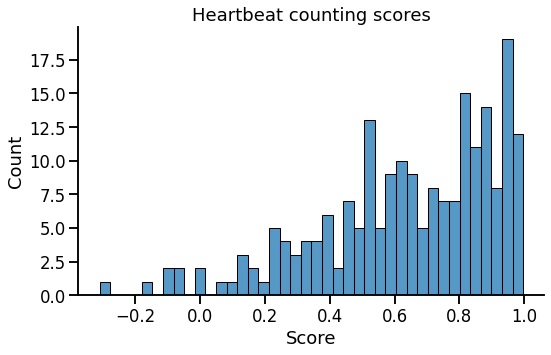

In [4]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 5))
sns.histplot(data=scores_df.groupby(['Subject'], as_index=False).mean(), x='Score', ax=ax, bins=40)
plt.tight_layout()
plt.title('Heartbeat counting scores')
sns.despine()

In [5]:
scores_df.to_csv(os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), 'data/hbc.txt'), index=False)